In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [3]:
from sklearn.datasets import load_boston
# 학습용 데이터 준비
boston = load_boston()
x_org, yt = boston.data, boston.target
feature_names = boston.feature_names
print('원본 데이터', x_org.shape, yt.shape)
print('항목 이름: ', feature_names)

# RM 데이터
x_data = x_org[:,feature_names == 'RM']
print('RM 데이터', x_data.shape)

# 더미 변수 추가
x = np.insert(x_data, 0, 1.0, axis=1)
print('더미 변수 추가 후의 RM 데이터', x.shape)

원본 데이터 (506, 13) (506,)
항목 이름:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
RM 데이터 (506, 1)
더미 변수 추가 후의 RM 데이터 (506, 2)


In [4]:
# 입력 데이터 x를 표시 (더미 변수 포함)
print(x.shape)
print(x[:5,:])

(506, 2)
[[1.    6.575]
 [1.    6.421]
 [1.    7.185]
 [1.    6.998]
 [1.    7.147]]


In [5]:
# 정답값 yt를 표시
print(yt[:5])

[24.  21.6 34.7 33.4 36.2]


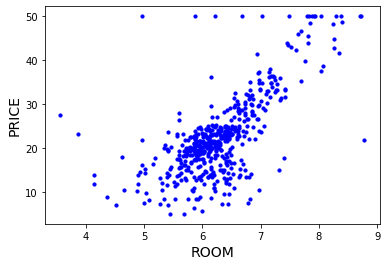

In [6]:
# 산점도를 표시
plt.scatter(x[:,1], yt, s=10, c='b')
plt.xlabel('ROOM', fontsize=14)
plt.ylabel('PRICE', fontsize=14)
plt.show()

In [7]:
# 예측함수 (1, x)의 값에서 예측값 yp를 계산
def pred(x, w):
    return(x @ w)

In [8]:
# 초기화 처리

# 데이터 전체 건수
M = x.shape[0]

# 입력 데이터의 차수 (더미 변수 포함)
D = x.shape[1]

# 반복 횟수
iters = 50000

# 학습률
alpha = 0.01

# 가중치 벡터의 초깃값 (모든 값을 1로 한다)
w = np.ones(D)

# 평가 결과 기록 (손실함수의 값만 기록)
history = np.zeros((0,2))

In [9]:
print(w)

[1. 1.]


In [13]:
yt.shape

(506,)

In [11]:
x.T.shape

(2, 506)

In [12]:
x.shape

(506, 2)

In [11]:
# 반복 루프
for k in range(iters):
    
    # 예측값 계산 (7.8.1)
    yp = pred(x, w)
    
    # 오차 계산 (7.8.2)
    yd = yp - yt
    
    # 경사하강법 적용 (7.8.4)
    w = w - alpha * (x.T @ yd) / M
    
    # 학습 곡선을 그리기 위한 데이터 계산 및 저장
    if (k % 100 == 0):
        # 손실함숫값의 계산 (7.6.1)
        loss = np.mean(yd ** 2) / 2
        # 계산 결과의 기록
        history = np.vstack((history, np.array([k, loss])))
        # 화면 표시
        print( "iter = %d loss = %f" % (k, loss))

iter = 0 loss = 154.224934
iter = 100 loss = 29.617518
iter = 200 loss = 29.431766
iter = 300 loss = 29.250428
iter = 400 loss = 29.073399
iter = 500 loss = 28.900577
iter = 600 loss = 28.731861
iter = 700 loss = 28.567154
iter = 800 loss = 28.406360
iter = 900 loss = 28.249388
iter = 1000 loss = 28.096145
iter = 1100 loss = 27.946544
iter = 1200 loss = 27.800498
iter = 1300 loss = 27.657922
iter = 1400 loss = 27.518733
iter = 1500 loss = 27.382852
iter = 1600 loss = 27.250200
iter = 1700 loss = 27.120700
iter = 1800 loss = 26.994277
iter = 1900 loss = 26.870858
iter = 2000 loss = 26.750372
iter = 2100 loss = 26.632749
iter = 2200 loss = 26.517921
iter = 2300 loss = 26.405821
iter = 2400 loss = 26.296385
iter = 2500 loss = 26.189549
iter = 2600 loss = 26.085252
iter = 2700 loss = 25.983433
iter = 2800 loss = 25.884034
iter = 2900 loss = 25.786997
iter = 3000 loss = 25.692265
iter = 3100 loss = 25.599784
iter = 3200 loss = 25.509501
iter = 3300 loss = 25.421363
iter = 3400 loss = 25.335

iter = 37800 loss = 21.801179
iter = 37900 loss = 21.801157
iter = 38000 loss = 21.801136
iter = 38100 loss = 21.801116
iter = 38200 loss = 21.801096
iter = 38300 loss = 21.801076
iter = 38400 loss = 21.801057
iter = 38500 loss = 21.801039
iter = 38600 loss = 21.801021
iter = 38700 loss = 21.801003
iter = 38800 loss = 21.800986
iter = 38900 loss = 21.800969
iter = 39000 loss = 21.800952
iter = 39100 loss = 21.800936
iter = 39200 loss = 21.800921
iter = 39300 loss = 21.800905
iter = 39400 loss = 21.800890
iter = 39500 loss = 21.800876
iter = 39600 loss = 21.800861
iter = 39700 loss = 21.800848
iter = 39800 loss = 21.800834
iter = 39900 loss = 21.800821
iter = 40000 loss = 21.800808
iter = 40100 loss = 21.800795
iter = 40200 loss = 21.800783
iter = 40300 loss = 21.800771
iter = 40400 loss = 21.800759
iter = 40500 loss = 21.800748
iter = 40600 loss = 21.800736
iter = 40700 loss = 21.800725
iter = 40800 loss = 21.800715
iter = 40900 loss = 21.800704
iter = 41000 loss = 21.800694
iter = 411

In [12]:
# 최종 손실함수 초깃값, 최종값
print('손실함수 초깃값: %f' % history[0,1])
print('손실함수 최종값: %f' % history[-1,1])

손실함수 초깃값: 154.224934
손실함수 최종값: 21.800325


In [13]:
# 다음 직선을 그리기 위한 좌푯값 계산
xall = x[:,1].ravel()
xl = np.array([[1, xall.min()],[1, xall.max()]])
yl = pred(xl, w)

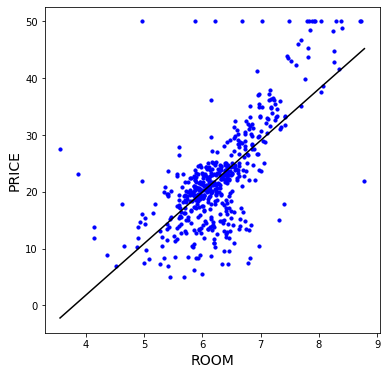

In [14]:
# 산점도와 회귀 직선 그리기
plt.figure(figsize=(6,6))
plt.scatter(x[:,1], yt, s=10, c='b')
plt.xlabel('ROOM', fontsize=14)
plt.ylabel('PRICE', fontsize=14)
plt.plot(xl[:,1], yl, c='k')
plt.show()

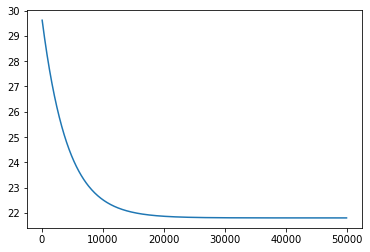

In [15]:
# 학습 곡선을 표시 (첫 1개분 제외)
plt.plot(history[1:,0], history[1:,1])
plt.show()

In [16]:
# 열(LSTAT: 저소득층 비율) 추가
x_add = x_org[:,feature_names == 'LSTAT']
x2 = np.hstack((x, x_add))
print(x2.shape)

(506, 3)


In [17]:
# 입력 데이터 x를 표시 (더미 데이터 포함)
print(x2[:5,:])

[[1.    6.575 4.98 ]
 [1.    6.421 9.14 ]
 [1.    7.185 4.03 ]
 [1.    6.998 2.94 ]
 [1.    7.147 5.33 ]]


In [18]:
# 초기화 처리

# 데이터 전체 건수
M = x2.shape[0]

# 입력 데이터의 차원 수 (더미 변수 포함)
D = x2.shape[1]

# 반복 횟수
iters = 50000

# 학습률
alpha = 0.01

# 가중치 벡터의 초깃값 (모든 값을 1로 한다)
w = np.ones(D)

# 평가 결과 기록 (손실함수의 값만 기록)
history = np.zeros((0,2))

In [19]:
# 반복 루프
for k in range(iters):
    
    # 예측값 계산 (7.8.1)
    yp = pred(x2, w)
    
    # 오차 계산 (7.8.2)
    yd = yp - yt
    
    # 경사하강법 적용 (7.8.4)
    w = w - alpha * (x2.T @ yd) / M
    
    # 학습 곡선 그리기용 데이터의 계산과 저장
    if (k % 100 == 0):
        # 손실함숫값의 계산 (7.6.1)
        loss = np.mean(yd ** 2) / 2
        # 계산 결과의 기록
        history = np.vstack((history, np.array([k, loss])))
        # 화면 표시
        print( "iter = %d loss = %f" % (k, loss))

iter = 0 loss = 112.063982
iter = 100 loss = 3753823486849646657661191585792.000000
iter = 200 loss = 2655334090092121273125402130921363327346591043573060835737600.000000
iter = 300 loss = 1878297995285461085045523284196482247086583201277085616612002646578050704876245186403893248.000000
iter = 400 loss = 1328647635059370371481703736763320157491450137821164352493234234699501961915925811873201177774480485596734461998977253376.000000
iter = 500 loss = 939842635502889662770612459069204655322935013749983559305346547831066121187997098891801614859352058834834127179648062098892108735689096962423654449152.000000
iter = 600 loss = 664814474659069633326225154456281621437843401089919849984802605951952813450932070104832955931408232444704376327323598259772619705292304255008658261182054817148272715437536805126144.000000
iter = 700 loss = 470268392835489012233685972589819183228214372013923782533073066974686786494923912473590265792480648724358954282601835762516495342680861832763187338192479316159724381

/home/jh/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()
/home/jh/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in matmul
  # This is added back by InteractiveShellApp.init_path()
/home/jh/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in subtract
  # This is added back by InteractiveShellApp.init_path()


iter = 19400 loss = nan
iter = 19500 loss = nan
iter = 19600 loss = nan
iter = 19700 loss = nan
iter = 19800 loss = nan
iter = 19900 loss = nan
iter = 20000 loss = nan
iter = 20100 loss = nan
iter = 20200 loss = nan
iter = 20300 loss = nan
iter = 20400 loss = nan
iter = 20500 loss = nan
iter = 20600 loss = nan
iter = 20700 loss = nan
iter = 20800 loss = nan
iter = 20900 loss = nan
iter = 21000 loss = nan
iter = 21100 loss = nan
iter = 21200 loss = nan
iter = 21300 loss = nan
iter = 21400 loss = nan
iter = 21500 loss = nan
iter = 21600 loss = nan
iter = 21700 loss = nan
iter = 21800 loss = nan
iter = 21900 loss = nan
iter = 22000 loss = nan
iter = 22100 loss = nan
iter = 22200 loss = nan
iter = 22300 loss = nan
iter = 22400 loss = nan
iter = 22500 loss = nan
iter = 22600 loss = nan
iter = 22700 loss = nan
iter = 22800 loss = nan
iter = 22900 loss = nan
iter = 23000 loss = nan
iter = 23100 loss = nan
iter = 23200 loss = nan
iter = 23300 loss = nan
iter = 23400 loss = nan
iter = 23500 los

In [25]:
# 초기화 처리 (매개변수를 적절한 값으로 변경)

# 데이터 전체 건수
M = x2.shape[0]

# 입력 데이터의 차원 수 (더미 변수를 포함)
D = x2.shape[1]

# 반복 횟수
iters = 50000
# iters = 2000

# 학습률
#alpha = 0.01
alpha = 0.001

# 가중치 벡터의 초깃값 (모든 값을 1로 한다)
w = np.ones(D)

# 평가 결과 기록 (손실함수의 값만 기록)
history = np.zeros((0,2))

In [26]:
# 반복 루프
for k in range(iters):
    
    # 예측값 계산 (7.8.1)
    yp = pred(x2, w)
    
    # 오차 계산 (7.8.2)
    yd = yp - yt
    
    # 경사하강법 적용 (7.8.4)
    w = w - alpha * (x2.T @ yd) / M
    
    # 학습 곡선 그리기용 데이터의 계산과 저장
    if (k % 100 == 0):
        # 손실함숫값의 계산 (7.6.1)
        loss = np.mean(yd ** 2) / 2
        # 계산 결과의 기록
        history = np.vstack((history, np.array([k, loss])))
        # 화면 표시
        print( "iter = %d loss = %f" % (k, loss))

iter = 0 loss = 112.063982
iter = 100 loss = 25.358934
iter = 200 loss = 16.391055
iter = 300 loss = 15.403015
iter = 400 loss = 15.294135
iter = 500 loss = 15.282114
iter = 600 loss = 15.280764
iter = 700 loss = 15.280589
iter = 800 loss = 15.280544
iter = 900 loss = 15.280514
iter = 1000 loss = 15.280485
iter = 1100 loss = 15.280456
iter = 1200 loss = 15.280428
iter = 1300 loss = 15.280399
iter = 1400 loss = 15.280371
iter = 1500 loss = 15.280342
iter = 1600 loss = 15.280314
iter = 1700 loss = 15.280285
iter = 1800 loss = 15.280257
iter = 1900 loss = 15.280228
iter = 2000 loss = 15.280200
iter = 2100 loss = 15.280172
iter = 2200 loss = 15.280143
iter = 2300 loss = 15.280115
iter = 2400 loss = 15.280087
iter = 2500 loss = 15.280059
iter = 2600 loss = 15.280031
iter = 2700 loss = 15.280002
iter = 2800 loss = 15.279974
iter = 2900 loss = 15.279946
iter = 3000 loss = 15.279918
iter = 3100 loss = 15.279890
iter = 3200 loss = 15.279862
iter = 3300 loss = 15.279834
iter = 3400 loss = 15.279

iter = 38300 loss = 15.271836
iter = 38400 loss = 15.271818
iter = 38500 loss = 15.271800
iter = 38600 loss = 15.271781
iter = 38700 loss = 15.271763
iter = 38800 loss = 15.271744
iter = 38900 loss = 15.271726
iter = 39000 loss = 15.271708
iter = 39100 loss = 15.271690
iter = 39200 loss = 15.271671
iter = 39300 loss = 15.271653
iter = 39400 loss = 15.271635
iter = 39500 loss = 15.271617
iter = 39600 loss = 15.271598
iter = 39700 loss = 15.271580
iter = 39800 loss = 15.271562
iter = 39900 loss = 15.271544
iter = 40000 loss = 15.271526
iter = 40100 loss = 15.271508
iter = 40200 loss = 15.271490
iter = 40300 loss = 15.271472
iter = 40400 loss = 15.271454
iter = 40500 loss = 15.271436
iter = 40600 loss = 15.271418
iter = 40700 loss = 15.271400
iter = 40800 loss = 15.271382
iter = 40900 loss = 15.271364
iter = 41000 loss = 15.271346
iter = 41100 loss = 15.271328
iter = 41200 loss = 15.271311
iter = 41300 loss = 15.271293
iter = 41400 loss = 15.271275
iter = 41500 loss = 15.271257
iter = 416

In [27]:
# 최종 손실함수 초깃값과 최종값
print('손실함수 초깃값: %f' % history[0,1])
print('손실함수 최종값: %f' % history[-1,1])

손실함수 초깃값: 112.063982
손실함수 최종값: 15.269837


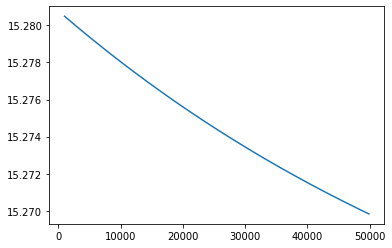

In [29]:
# 학습 곡선을 표시(처음 10개분 제외)
plt.plot(history[10:,0], history[10:,1])
plt.show()